## Alpha Levels

In [1]:
import json

In [7]:
with open('MNIST_combined_results.json', 'r') as file:
    data = json.load(file)

data[0].keys()

dict_keys(['dataset', 'n_labels', 'corruption_rate', 'alpha', 'seed', 'final_test_elbo', 'final_test_accuracy', 'train_elbos', 'test_elbos', 'test_accuracies', 'disentanglement_metrics', 'config'])

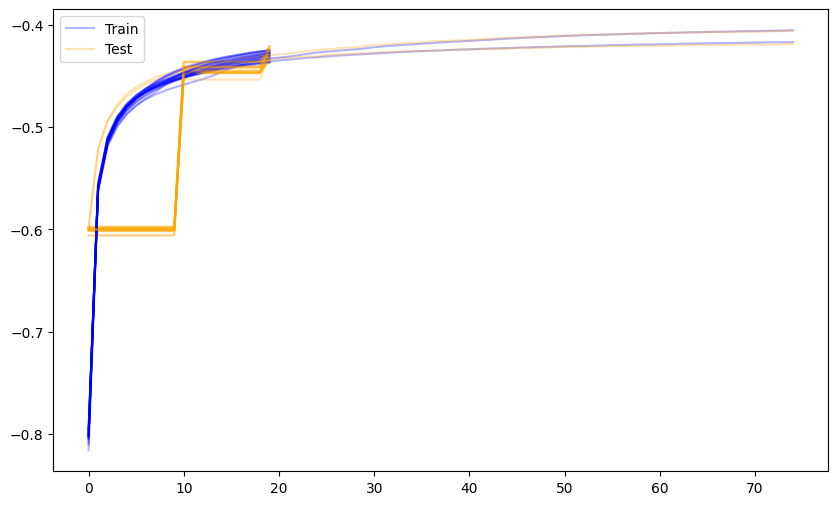

In [33]:
import random
import matplotlib.pyplot as plt

# Assuming 'results' is your list
sample = random.sample(data, 20)

plt.figure(figsize=(10, 6))
for i, item in enumerate(sample):
    # Adjust keys if using objects instead of dicts
    plt.plot(item['train_elbos'], c='blue', alpha=0.3, label='Train' if i == 0 else "")
    plt.plot(item['test_elbos'], c='orange', alpha=0.3, label='Test' if i == 0 else "")

plt.legend()
plt.show()

In [30]:
import pandas as pd

# 'results' is your list of dictionaries
df = pd.json_normalize(data)

# Select grouping keys and flattened disentanglement metrics
group_cols = ['n_labels', 'corruption_rate', 'alpha']
metric_cols = [c for c in df.columns if c.startswith('disentanglement_metrics')] + ['final_test_elbo', 'final_test_accuracy']

# Aggregate with mean and std
summary_df = df.groupby(group_cols)[metric_cols].agg(['mean', 'var'])
summary_df

disentanglement_metrics.beta_vae            \
                                                           mean       var   
n_labels corruption_rate alpha                                              
100      0.0             0.1                           0.178000  0.000254   
                         0.5                           0.178000  0.000254   
                         1.0                           0.178000  0.000254   
                         50.0                          0.171778  0.000497   
                         100.0                         0.178000  0.000254   
600      0.0             0.1                           0.171111  0.000610   
                         0.5                           0.171111  0.000610   
                         1.0                           0.171111  0.000610   
                         50.0                          0.171111  0.000610   
                         100.0                         0.171111  0.000610   
1000     0.0             0.1                           0.166556  0.000690   
                         0.5                           0.166556  0.000690   
                         1.0                           0.166556  0.000690   
                         50.0                          0.166556  0.000690   
                         100.0                         0.166556  0.000690   
3000     0.0             0.1                           0.152556  0.000488   
                         0.5                           0.152556  0.000488   
                         1.0                           0.152556  0.000488   
                         50.0                          0.152556  0.000488   
                         100.0                         0.152556  0.000488   

                               disentanglement_metrics.factor_vae            \
                                                             mean       var   
n_labels corruption_rate alpha                                                
100      0.0             0.1                             0.580489  0.001651   
                         0.5                             0.580489  0.001651   
                         1.0                             0.580489  0.001651   
                         50.0                            0.495740  0.013859   
                         100.0                           0.580489  0.001651   
600      0.0             0.1                             0.543087  0.002050   
                         0.5                             0.543087  0.002050   
                         1.0                             0.543087  0.002050   
                         50.0                            0.543087  0.002050   
                         100.0                           0.543087  0.002050   
1000     0.0             0.1                             0.518078  0.002905   
                         0.5                             0.518078  0.002905   
                         1.0                             0.518078  0.002905   
                         50.0                            0.518078  0.002905   
                         100.0                           0.518078  0.002905   
3000     0.0             0.1                             0.391966  0.000838   
                         0.5                             0.391966  0.000838   
                         1.0                             0.391966  0.000838   
                         50.0                            0.391966  0.000838   
                         100.0                           0.391966  0.000838   

                               disentanglement_metrics.mig            \
                                                      mean       var   
n_labels corruption_rate alpha                                         
100      0.0             0.1                      0.084615  0.001384   
                         0.5                      0.084615  0.001384   
                         1.0                      0.084615  0.001384   
         

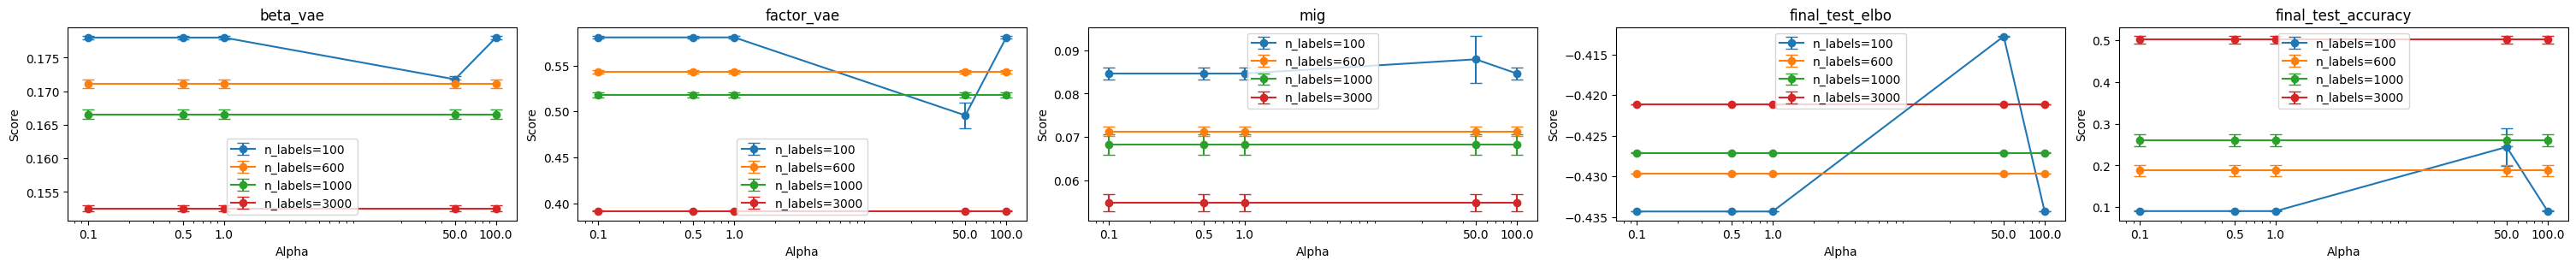

In [31]:
import matplotlib.pyplot as plt

# Flatten MultiIndex columns (e.g., ('metric', 'mean') -> 'metric_mean')
summary_df_flat = summary_df.copy()
summary_df_flat.columns = ['_'.join(col).strip() for col in summary_df_flat.columns.values]
df_plot = summary_df_flat.reset_index()

# Identify unique metrics
metrics = [c.replace('_mean', '') for c in df_plot.columns if c.endswith('_mean')]

# Create subplots
fig, axes = plt.subplots(1, len(metrics), figsize=(6 * len(metrics), 3), constrained_layout=True)
if len(metrics) == 1: axes = [axes]

for ax, metric in zip(axes, metrics):
    for n_label, grp in df_plot.groupby('n_labels'):
        ax.errorbar(
            grp['alpha'], 
            grp[f'{metric}_mean'], 
            yerr=grp[f'{metric}_var'], 
            label=f'n_labels={n_label}', 
            capsize=5, 
            marker='o'
        )
    ax.set_xscale('log')
    alphas = sorted(df_plot['alpha'].unique())
    ax.set_xticks(alphas)
    ax.set_xticklabels(alphas)
    ax.set_xlabel('Alpha')
    ax.set_ylabel('Score')
    ax.set_title(metric.split('.')[-1])
    ax.legend()

plt.show()

## Noise Levels